In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
wind_df = pd.read_csv('wine-clustering.csv')

In [3]:
wind_df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wind_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wind_df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
len(wind_df.columns)

13

In [8]:
data = wind_df.copy()

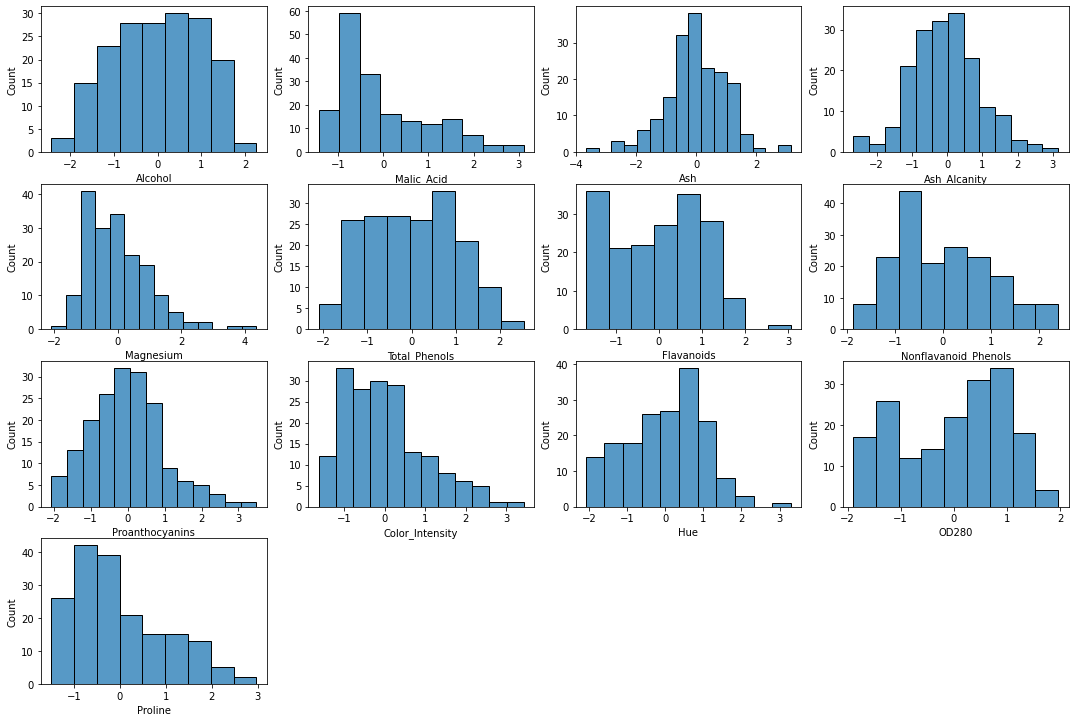

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,10))
plt.tight_layout()
fig.delaxes(ax= ax[3,1])
fig.delaxes(ax= ax[3,2])
fig.delaxes(ax= ax[3,3])
i, j = 0, 0
for feature in data.columns:
    if j == 4:
        i += 1
        j = 0
    sns.histplot(data[feature], fill=True, ax=ax[i,j], edgecolor='black')
    j += 1
plt.show()

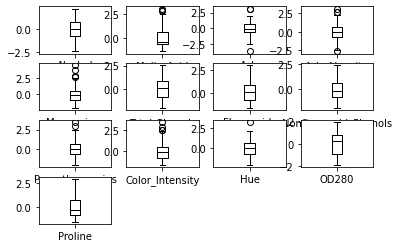

<Figure size 1440x720 with 0 Axes>

In [99]:
plt.figure(figsize=(20,10))
data.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [21]:
std_scaler = StandardScaler()
data = wind_df.copy()
data[data.columns] = std_scaler.fit_transform(data)

In [22]:
pca_2 = PCA(2)
pca_result = pca_2.fit_transform(data)

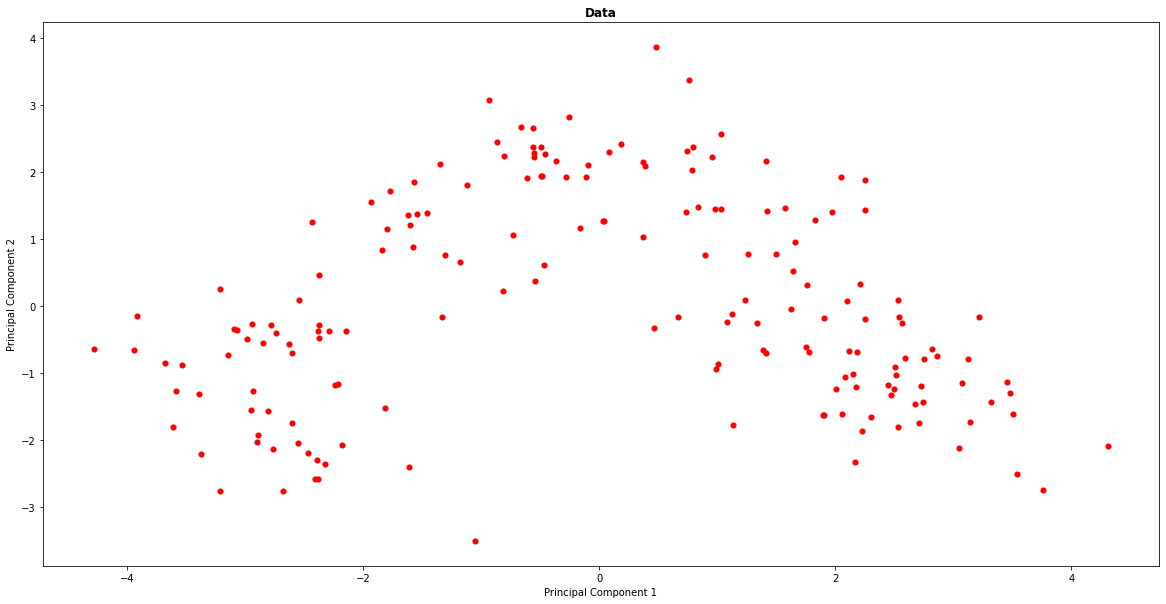

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data',fontweight='bold')
plt.show()

In [24]:
Inertia = []
Silhouette = []

for i in range(2,11):
    model = KMeans(n_clusters=i, init='k-means++', n_init=20, max_iter=500, random_state=10)
    model.fit(data)
    Inertia.append(model.inertia_)
    Silhouette.append(silhouette_score(data, model.labels_,metric='euclidean'))

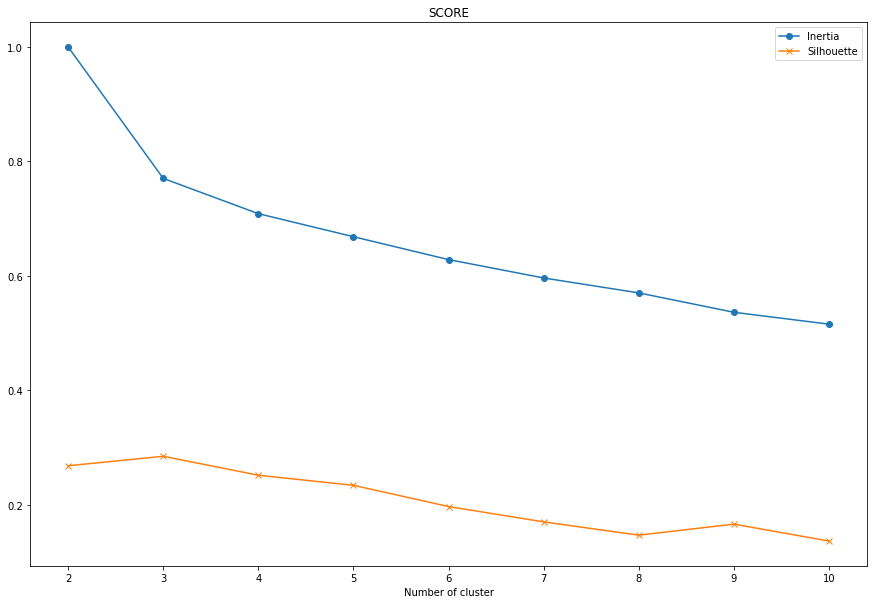

In [26]:
x = [x for x in range(2,11)]
max_score = max(Inertia)
Inertia = [x/max_score for x in Inertia]
plt.figure(figsize=(15,10))
plt.title('SCORE')
plt.xlabel('Number of cluster')
plt.plot(x, Inertia, marker='o', label='Inertia')
plt.plot(x, Silhouette, marker='x', label='Silhouette')
plt.legend()
plt.show()

In [54]:
model = KMeans(n_clusters=3,random_state=10,init='k-means++')
labels = model.fit_predict(data)

centroids = model.cluster_centers_
centroids_pca = pca_2.transform(centroids)

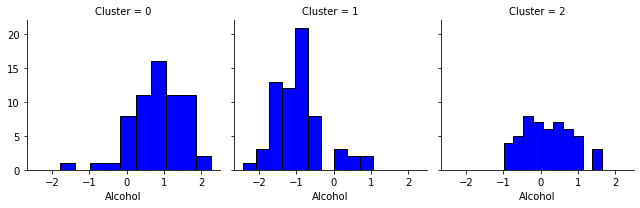

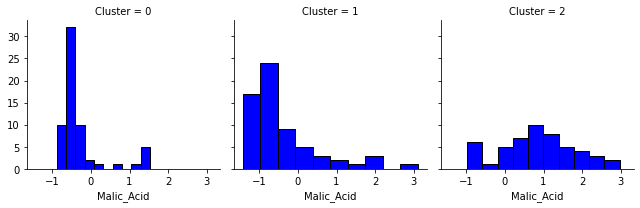

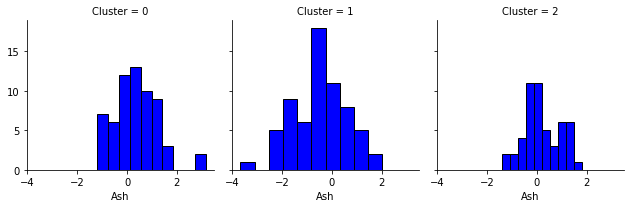

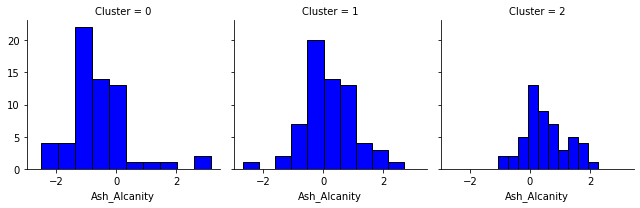

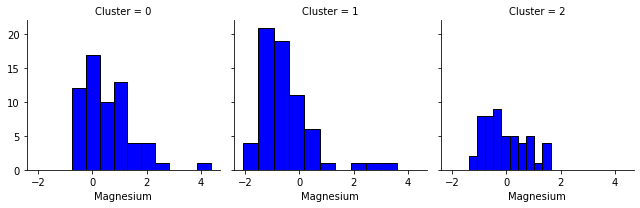

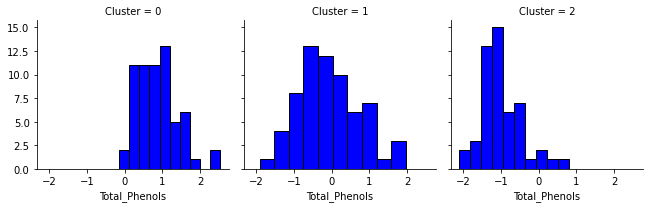

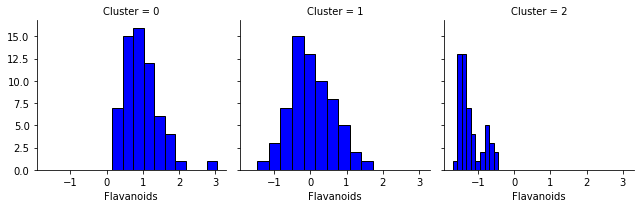

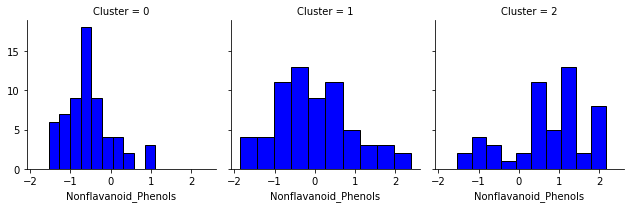

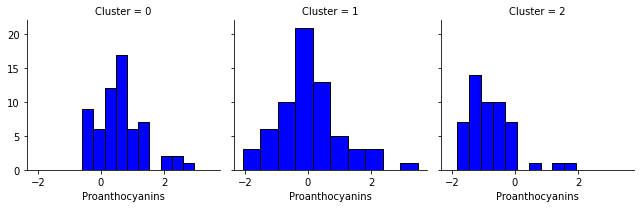

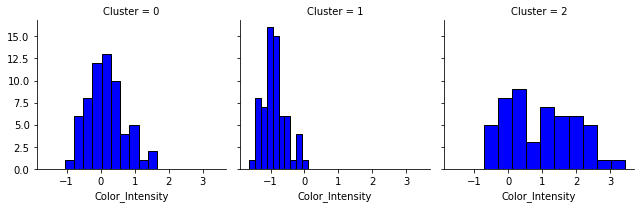

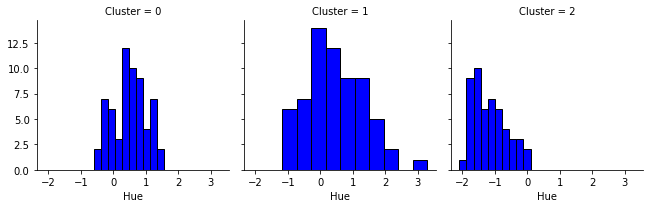

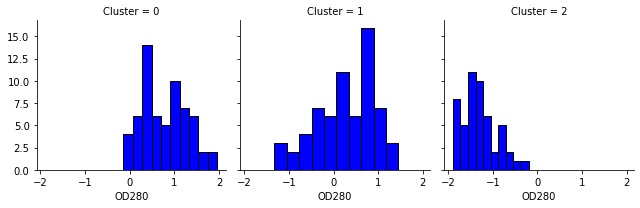

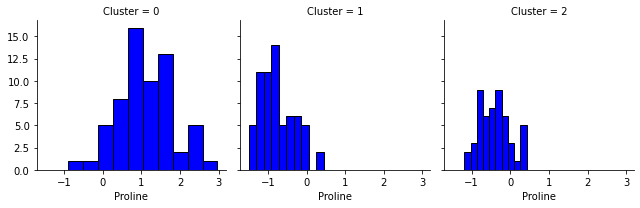

In [33]:
new_data=data.copy()
new_data['Cluster']=labels

aux=new_data.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(new_data, col='Cluster')
    grid.map(plt.hist, cluster, color='blue', edgecolor='black')

In [103]:
centroids

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [29]:
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=data.columns)
centroids_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [49]:
pca_result = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_result['cluster'] = labels

In [57]:
cluster_0 = pca_result[pca_result['cluster'] == 0]
cluster_1 = pca_result[pca_result['cluster'] == 1]
cluster_2 = pca_result[pca_result['cluster'] == 2]

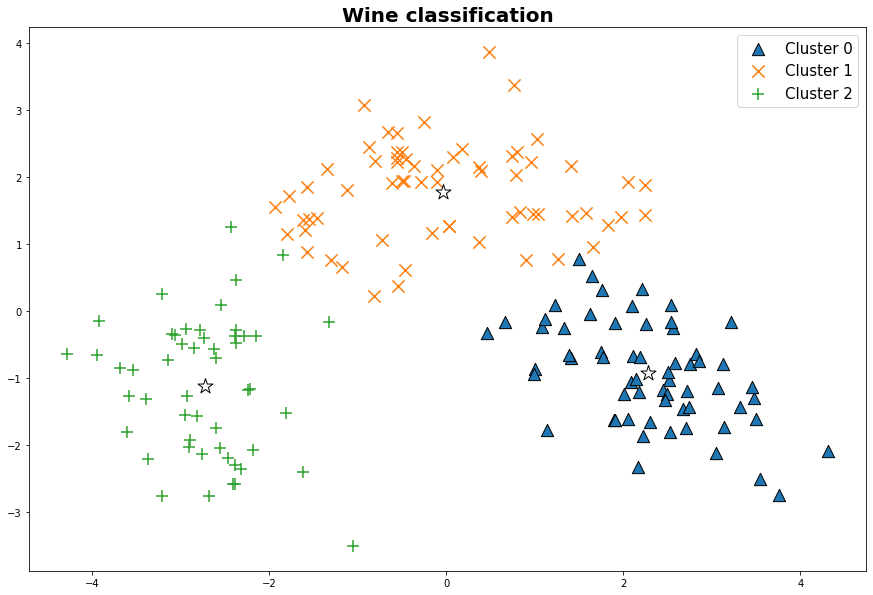

In [102]:
plt.figure(figsize=(15,10))
plt.scatter(x=cluster_0['Principal Component 1'], y=cluster_0['Principal Component 2'], marker='^', label='Cluster 0', s=150, edgecolor='black')
plt.scatter(x=cluster_1['Principal Component 1'], y=cluster_1['Principal Component 2'], marker='x', label='Cluster 1', s=150, edgecolor='black')
plt.scatter(x=cluster_2['Principal Component 1'], y=cluster_2['Principal Component 2'], marker='+', label='Cluster 2', s=150, edgecolor='black')
plt.scatter(x=centroids_pca['Principal Component 1'], y=centroids_pca['Principal Component 2'], marker='*', s=250, edgecolor='black', color='white')
plt.legend(prop={'size': 15})
plt.title('Wine classification', fontweight='bold', fontsize=20)
plt.show()